In [1]:
#Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
##set the working directory
os.chdir("C:/Users/Aurangzeb Alam/Desktop/DataSet/1. www.machinelearningmastery.com/2. Wine Quality Dataset/Me")

In [3]:
#check the working Directory
os.getcwd()

'C:\\Users\\Aurangzeb Alam\\Desktop\\DataSet\\1. www.machinelearningmastery.com\\2. Wine Quality Dataset\\Me'

In [4]:
#Load the data
Dataset = pd.read_csv("wine_quality.csv")

In [5]:
#Head of the data
Dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
#Shape of the Dataset
Dataset.shape

(6497, 13)

In [7]:
#Unique number
print(Dataset["type"].nunique())

2


In [8]:
#Numerical columns
numerical_columns = Dataset.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:
#Statistical Description
Dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
#Check the missing values
missing_value = pd.DataFrame(Dataset.isnull().sum())
missing_value

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [11]:
#Total missing value
Dataset.isnull().sum().sum()

38

In [12]:
#impute the nan with mean
Dataset = Dataset.fillna(Dataset.mean())

In [13]:
#Now check missing value again
Dataset.isnull().sum().sum()

0

In [14]:
# There are not any nan values in dataset , encode the column having unique value
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Dataset['type'] = Encoder.fit_transform(Dataset['type'])

# Outliers

<Figure size 1440x1440 with 0 Axes>

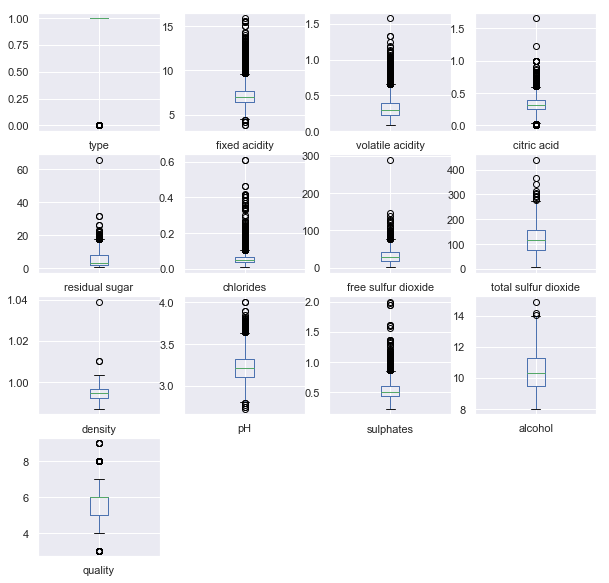

In [15]:
#Outliers
plt.figure(figsize=(20,20))
Dataset.plot(kind="box",subplots=True,layout=(4,4), figsize=(10,10))
plt.show()

In [16]:
#Detect and remove the outliers
for i in numerical_columns:
    print(i)
    q75,q25=np.percentile(Dataset[i],[75,25])
    iqr = q75-q25
    min = q25-(iqr*1.5)
    print(min)
    max = q75+(iqr*1.5)
    print(max)
    Dataset.loc[Dataset[i]<min,i] = np.nan
    Dataset.loc[Dataset[i]>max,i] = np.nan

fixed acidity
4.450000000000001
9.65
volatile acidity
-0.024999999999999994
0.655
citric acid
0.03999999999999998
0.6000000000000001
residual sugar
-7.6499999999999995
17.549999999999997
chlorides
-0.002500000000000009
0.10550000000000001
free sulfur dioxide
-19.0
77.0
total sulfur dioxide
-41.5
274.5
density
0.985365
1.0039649999999998
pH
2.795
3.635
sulphates
0.175
0.855
alcohol
6.799999999999999
14.000000000000002
quality
3.5
7.5


In [17]:
#Now find the missing value 
Dataset.isnull().sum().sum()

2215

In [18]:
#Impute by mean
Dataset = Dataset.fillna(Dataset.mean())

In [19]:
#Now find the missing value 
Dataset.isnull().sum().sum()

0

In [20]:
#Split data into independent and dependent
X = Dataset.iloc[:,1:]
y=Dataset.iloc[:,:1]

In [21]:
#spliting data into train and and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state = 10)

In [22]:
#Check X shape
X.shape

(6497, 12)

In [23]:
#Check X shape
X.shape

(6497, 12)

In [24]:
#Specific implementation of Naive byes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB() # instantiate the Naive byes object
naive_bayes.fit(X_train,y_train)
prediction = naive_bayes.predict(X_test)
prediction 

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, ..., 0, 1, 1])

In [25]:
from sklearn import metrics
metrics.accuracy_score(prediction,y_test)

0.982051282051282

In [26]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(prediction,y_test)
Confusion_matrix

array([[ 474,   15],
       [  20, 1441]], dtype=int64)